## Gradient Descent Example

In [180]:
from sklearn.datasets import make_regression, make_classification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Starting with Max bound Cost of 999999999
Cost at 0 Epochs: [7132.72157965]


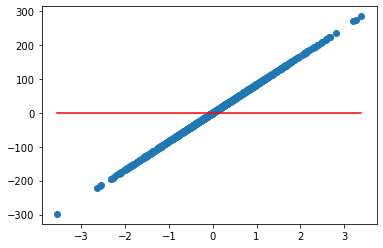

Cost at 1000 Epochs: [122.60333953]


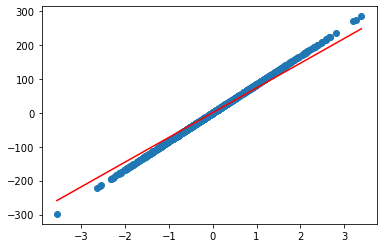

Cost at 2000 Epochs: [2.16708639]


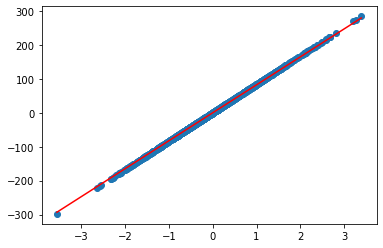

[83.62152919] [0.02401955] [0.08153621]


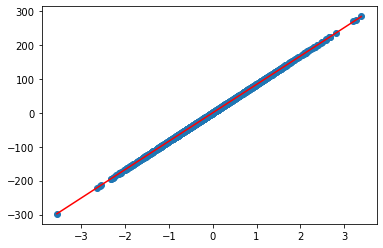

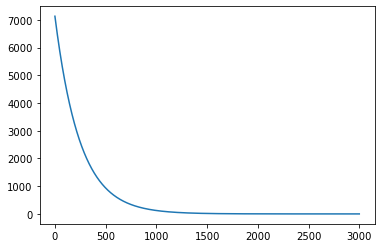

In [179]:
def gen_data(n):
    X, y = make_regression(n, n_features=1, noise=0.2, n_targets=1)
    y = y.reshape(-1, 1).astype(np.float32)
    return np.array(X), y

def display_model_and_regression(X,y,m,c):
    Y_pred = m*X + c

    plt.scatter(X, y) 
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
    plt.show()
    
def display_model_cost(cost_history):
    
    cost = list(cost_history.values())
    itrs = list(cost_history.keys())
    plt.plot(itrs, cost)
    plt.show()


def linear_regression_gradient_descent(X, y):

    m = 0
    c = 0
    
    X = X
    y = y
    
    learning_rate = 0.001  # The learning Rate
    epochs = 3000 # The number of iterations to perform gradient descent

    n = float(len(X)) # Number of elements in X
    cost_history = {}
    cost_previous_iter = 999999999
    print('Starting with Max bound Cost of {}'.format(cost_previous_iter))
    # Performing Gradient Descent 
    for i in range(epochs): 
        
        Y_pred = m*X + c  # The current predicted value of Y
        
        if i > 0: # Don't copy the cost if it our first epoch
            cost_previous_iter = abs(cost).copy()
           
        #Calculate the cost function! This is is Mean Square Error!
        cost = sum([data**2 for data in (y- Y_pred)]) / n
        cost_history[i] = abs(cost[0])
        if i % 200 == 0:
            print('Cost at {} Epochs: {}'.format(i, cost))
            display_model_and_regression(X,y, m, c)
        #see if the cost is going down...
        if abs(cost_previous_iter) >= abs(cost):
            D_m = (-2/n) * sum(X * (y - Y_pred))  # Partial Differential with respect to m
            D_c = (-2/n) * sum(y - Y_pred)  # Partial Differential with respect to c
            m = m - learning_rate * D_m  # Update m
            c = c - learning_rate * D_c  # Update c
        else:
            print('Reached lowest Cost (Maybe Local Minimum) at Iteration {}'.format(i))
            break

    print (m, c, cost)
    return m, c, cost, cost_history


    
X , y = gen_data(1000)
m, c, final_cost, cost_history = linear_regression_gradient_descent(X, y)
display_model_and_regression(X,y, m, c)
display_model_cost(cost_history)

## Logistic Regresion

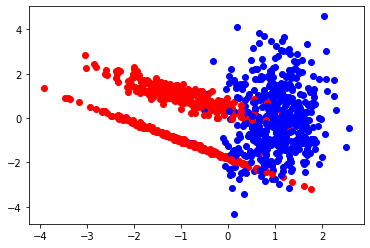

iter: 0 cost: 0.6906508506622083
iter: 200 cost: 0.42393967535314786
iter: 400 cost: 0.33560787676854853
iter: 600 cost: 0.29342155069960724
iter: 800 cost: 0.26902070748947593
iter: 1000 cost: 0.2532455966441435
iter: 1200 cost: 0.24228544083182532
iter: 1400 cost: 0.2342784823344183
iter: 1600 cost: 0.22820897009646007
iter: 1800 cost: 0.2234762741122775
iter: 2000 cost: 0.21970279586422883
iter: 2200 cost: 0.216639435761566
iter: 2400 cost: 0.21411535303659576
iter: 2600 cost: 0.21200956974656343
iter: 2800 cost: 0.2102340908631551
iter: 3000 cost: 0.2087234386076397
iter: 3200 cost: 0.2074279279748243
iter: 3400 cost: 0.2063092116981452
iter: 3600 cost: 0.20533724924253277
iter: 3800 cost: 0.20448819606156116
iter: 4000 cost: 0.20374290316665872
iter: 4200 cost: 0.20308583084249493
iter: 4400 cost: 0.20250424920452373
iter: 4600 cost: 0.2019876411099345
iter: 4800 cost: 0.20152725020614687
iter: 5000 cost: 0.2011157346567531
iter: 5200 cost: 0.20074689887536593
iter: 5400 cost: 0.2

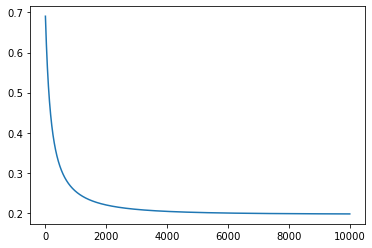

In [247]:
def gen_data_classification(n, features = 2):
    
    X, y = make_classification(n_samples=n, n_features=features, n_redundant=0, n_classes=2)
    return X,y

def disply_classification_data(X,y):
    
    for i in range(0, len(y)):
        if y[i] == 1:
            plt.scatter(X[i][0], X[i][1], label=str(y[i]), c='b')
        if y[i] == 0:
            plt.scatter(X[i][0], X[i][1], label=str(y[i]), c='r')
#     plt.legend(loc='upper right');
    plt.show()
    

                  
def display_model_cost(cost_history):
    
    cost = list(cost_history.values())
    itrs = list(cost_history.keys())
    plt.plot(itrs, cost)
    plt.show()

def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()
    
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


def predict(features, weights):
    '''
    Returns 1D array of probabilities
    that the class label == 1
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

def decision_boundary(prob):
    return 1 if prob >= .5 else 0


def classify(predictions):
    '''
    input  - N element array of predictions between 0 and 1
    output - N element array of 0s (False) and 1s (True)
    '''
    decision_boundary = np.vectorize(decision_boundary)
    
    return decision_boundary(predictions).flatten()


def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost


def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights




def logisitic_regression_gradient_descent(X, y, weights, lr, iters):
    
    features, labels = X, y

    cost_history = {}

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history[i] = cost

        # Log Progress
        if i % 200 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history


    
X , y = gen_data_classification(1000, features = 2)
disply_classification_data(X,y)
log_weights, log_cost_history = logisitic_regression_gradient_descent(X,y, [0,0],0.01,10000)
display_model_cost(log_cost_history)

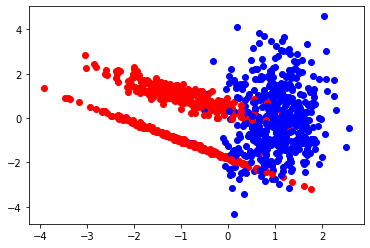

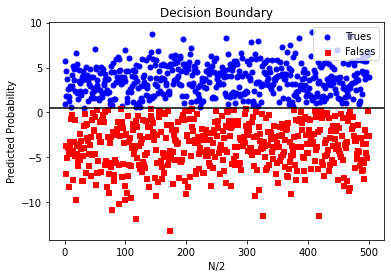

In [248]:
def display_model_and_logistic(X,y,w1,w2):
    
    for i in range(0, len(y)):
        if y[i] == 1:
            plt.scatter(X[i][0], X[i][1], label=str(y[i]), c='b')
        if y[i] == 0:
            plt.scatter(X[i][0], X[i][1], label=str(y[i]), c='r')
    plt.show()
    X_one = []
    X_two = []
    for x in X:
        X_one.append(x[0])
        X_two.append(x[1])
    c = 0
    Y_pred = w1*np.array(X_one) + w2*np.array(X_two) + c
    trues = []
    falses = []
    labels = []
    for pred in Y_pred:
        if pred > 0.5:
            trues.append(pred)
            labels.append(1)
        else:
            falses.append(pred)
            labels.append(0)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()
    return labels

labels = display_model_and_logistic(X,y,log_weights[0],log_weights[1])

In [249]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

accuracy(labels, y)

0.9299999999999999

# Cross-Entropy Example

[[0.0, 1.0], [0.09999999999999998, 0.9], [0.19999999999999996, 0.8], [0.30000000000000004, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
[-1.110223024625156e-15, 0.10536051565782517, 0.22314355131420846, 0.356674943938731, 0.5108256237659891, 0.6931471805599433, 0.9162907318741526, 1.2039728043259328, 1.6094379124340954, 2.3025850929940357]


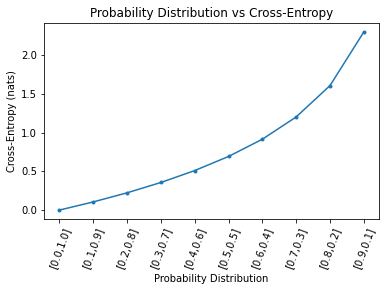

In [21]:
#cross-entropy for predicted probability distribution vs label
from math import log
from matplotlib import pyplot
 
# calculate cross-entropy
def cross_entropy(p, q, ets=1e-15):
	return -sum([p[i]*log(q[i]+ets) for i in range(len(p))])
 
# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
# create probability distributions for the two events
dists = [[1.0 - p, p] for p in probs]
print(dists)
# calculate cross-entropy for each distribution
ents = [cross_entropy(target, d) for d in dists]
print(ents)
# plot probability distribution vs cross-entropy
pyplot.plot([1-p for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()

In [19]:
# calculate cross entropy for classification problem
from math import log
from numpy import mean

# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log(q[i]) for i in range(len(p))])

# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]
# calculate cross entropy for each example
results = list()
for i in range(len(p)):
	# create the distribution for each event {0, 1}
	expected = [1.0 - p[i], p[i]]
	predicted = [1.0 - q[i], q[i]]
	# calculate cross entropy for the two events
	ce = cross_entropy(expected, predicted)
	print('>[y=%.1f, yhat=%.1f] ce: %.3f nats' % (p[i], q[i], ce))
	results.append(ce)

# calculate the average cross entropy
mean_ce = mean(results)
print('Average Cross Entropy: %.3f nats' % mean_ce)

>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.6] ce: 0.511 nats
>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=1.0, yhat=0.1] ce: 2.303 nats
>[y=0.0, yhat=0.4] ce: 0.511 nats
>[y=0.0, yhat=0.2] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.3] ce: 0.357 nats


IndexError: list index out of range

In [18]:
# calculate cross entropy with keras
from numpy import asarray
from tensorflow import keras
import tensorflow.keras.backend as backend
from tensorflow.keras.losses import BinaryCrossentropy
# prepare classification data
p = asarray([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
q = asarray([0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3])
# convert to keras variables
y_true = backend.variable(p)
y_pred = backend.variable(q)
# calculate the average cross-entropy
bce = BinaryCrossentropy()
mean_ce = backend.eval(bce(y_true, y_pred))
print('Average Cross Entropy: %.3f nats' % mean_ce)

Average Cross Entropy: 0.247 nats
